In [4]:
!pip install -r requirements.txt

  Using cached pandas-2.2.3-cp312-cp312-win_amd64.whl.metadata (19 kB)
  Using cached matplotlib-3.10.3-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached notebook-7.4.2-py3-none-any.whl.metadata (10 kB)
  Using cached jupyter_server-2.16.0-py3-none-any.whl.metadata (8.5 kB)
  Using cached jupyterlab_server-2.27.3-py3-none-any.whl.metadata (5.9 kB)
  Using cached jupyterlab-4.4.2-py3-none-any.whl.metadata (16 kB)
  Using cached notebook_shim-0.2.4-py3-none-any.whl.metadata (4.0 kB)
  Using cached argon2_cffi-23.1.0-py3-none-any.whl.metadata (5.2 kB)
  Using cached jupyter_events-0.12.0-py3-none-any.whl.metadata (5.8 kB)
  Using cached jupyter_server_terminals-0.5.3-py3-none-any.whl.metadata (5.6 kB)
  Using cached nbconvert-7.16.6-py3-none-any.whl.metadata (8.5 kB)
  Using cached nbformat-5.10.4-py3-none-any.whl.metadata (3.6 kB)
  Using cached httpx-0.28.1-py3-none-any.whl.metadata (7.1 kB)
  Using cached jupyter_

In [221]:
#Importing Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format
 
#Importing Train-Test split for validation
from sklearn.model_selection import train_test_split

# to perform Scaling
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# import various functions from sklearn
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# import function to perform feature selection
from sklearn.feature_selection import RFE


In [15]:
import os
os.listdir('.')

['.git',
 '.venv',
 'classification',
 'heart.ipynb',
 'heart.py',
 'Heart_Disease_Prediction.csv',
 'requirements.txt']

Binary Classfication - Heart Disease Predicition.

In [116]:
df=pd.read_csv('Heart_Disease_Prediction.csv')

In [117]:
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.400000,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.600000,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.300000,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.200000,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.200000,1,1,3,Absence


In [118]:
df.shape

(270, 14)

In [119]:
df.columns

Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease'],
      dtype='object')

In [120]:
df.dtypes

Age                          int64
Sex                          int64
Chest pain type              int64
BP                           int64
Cholesterol                  int64
FBS over 120                 int64
EKG results                  int64
Max HR                       int64
Exercise angina              int64
ST depression              float64
Slope of ST                  int64
Number of vessels fluro      int64
Thallium                     int64
Heart Disease               object
dtype: object

In [121]:
df['FBS over 120'].value_counts()
df['EKG results'].value_counts()
df['Exercise angina'].value_counts()
df['Slope of ST'].value_counts()
df['Number of vessels fluro'].value_counts()
df['Thallium'].value_counts()

Thallium
3    152
7    104
6     14
Name: count, dtype: int64

In [122]:
#Changing the data types of the columns

df['Sex']=df['Sex'].astype('category')
df['Chest pain type']=df['Chest pain type'].astype('category')
df['FBS over 120']=df['FBS over 120'].astype('category')
df['EKG results']=df['EKG results'].astype('category')
df['Exercise angina']=df['Exercise angina'].astype('category')
df['Slope of ST']=df['Slope of ST'].astype('category')
df['Number of vessels fluro']=df['Number of vessels fluro'].astype('category')
df['Thallium']=df['Thallium'].astype('category')
df['Heart Disease']=df['Heart Disease'].astype('category')


Sex as it is a categorical variable.
Chest pain type as it is a categorical variable.
FBS over 120 as it is a categorical variable.
EKG results as it is a categorical variable.
Exercise angina as it is a categorical variable.
Slope of ST as it is a categorical variable.
Number of vessels fluro as it is a categorical variable.
Thallium as it is a categorical variable.

No Null Values


In [123]:
# Checking for null values
df.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

Stanadard Deviation

In [124]:
#Checking the Standard Deviation of the columns
df.select_dtypes(include='int').std()

Age            9.109067
BP            17.861608
Cholesterol   51.686237
Max HR        23.165717
dtype: float64

No Features with low Stanadard Deviation.


Numerical Columns Visulization

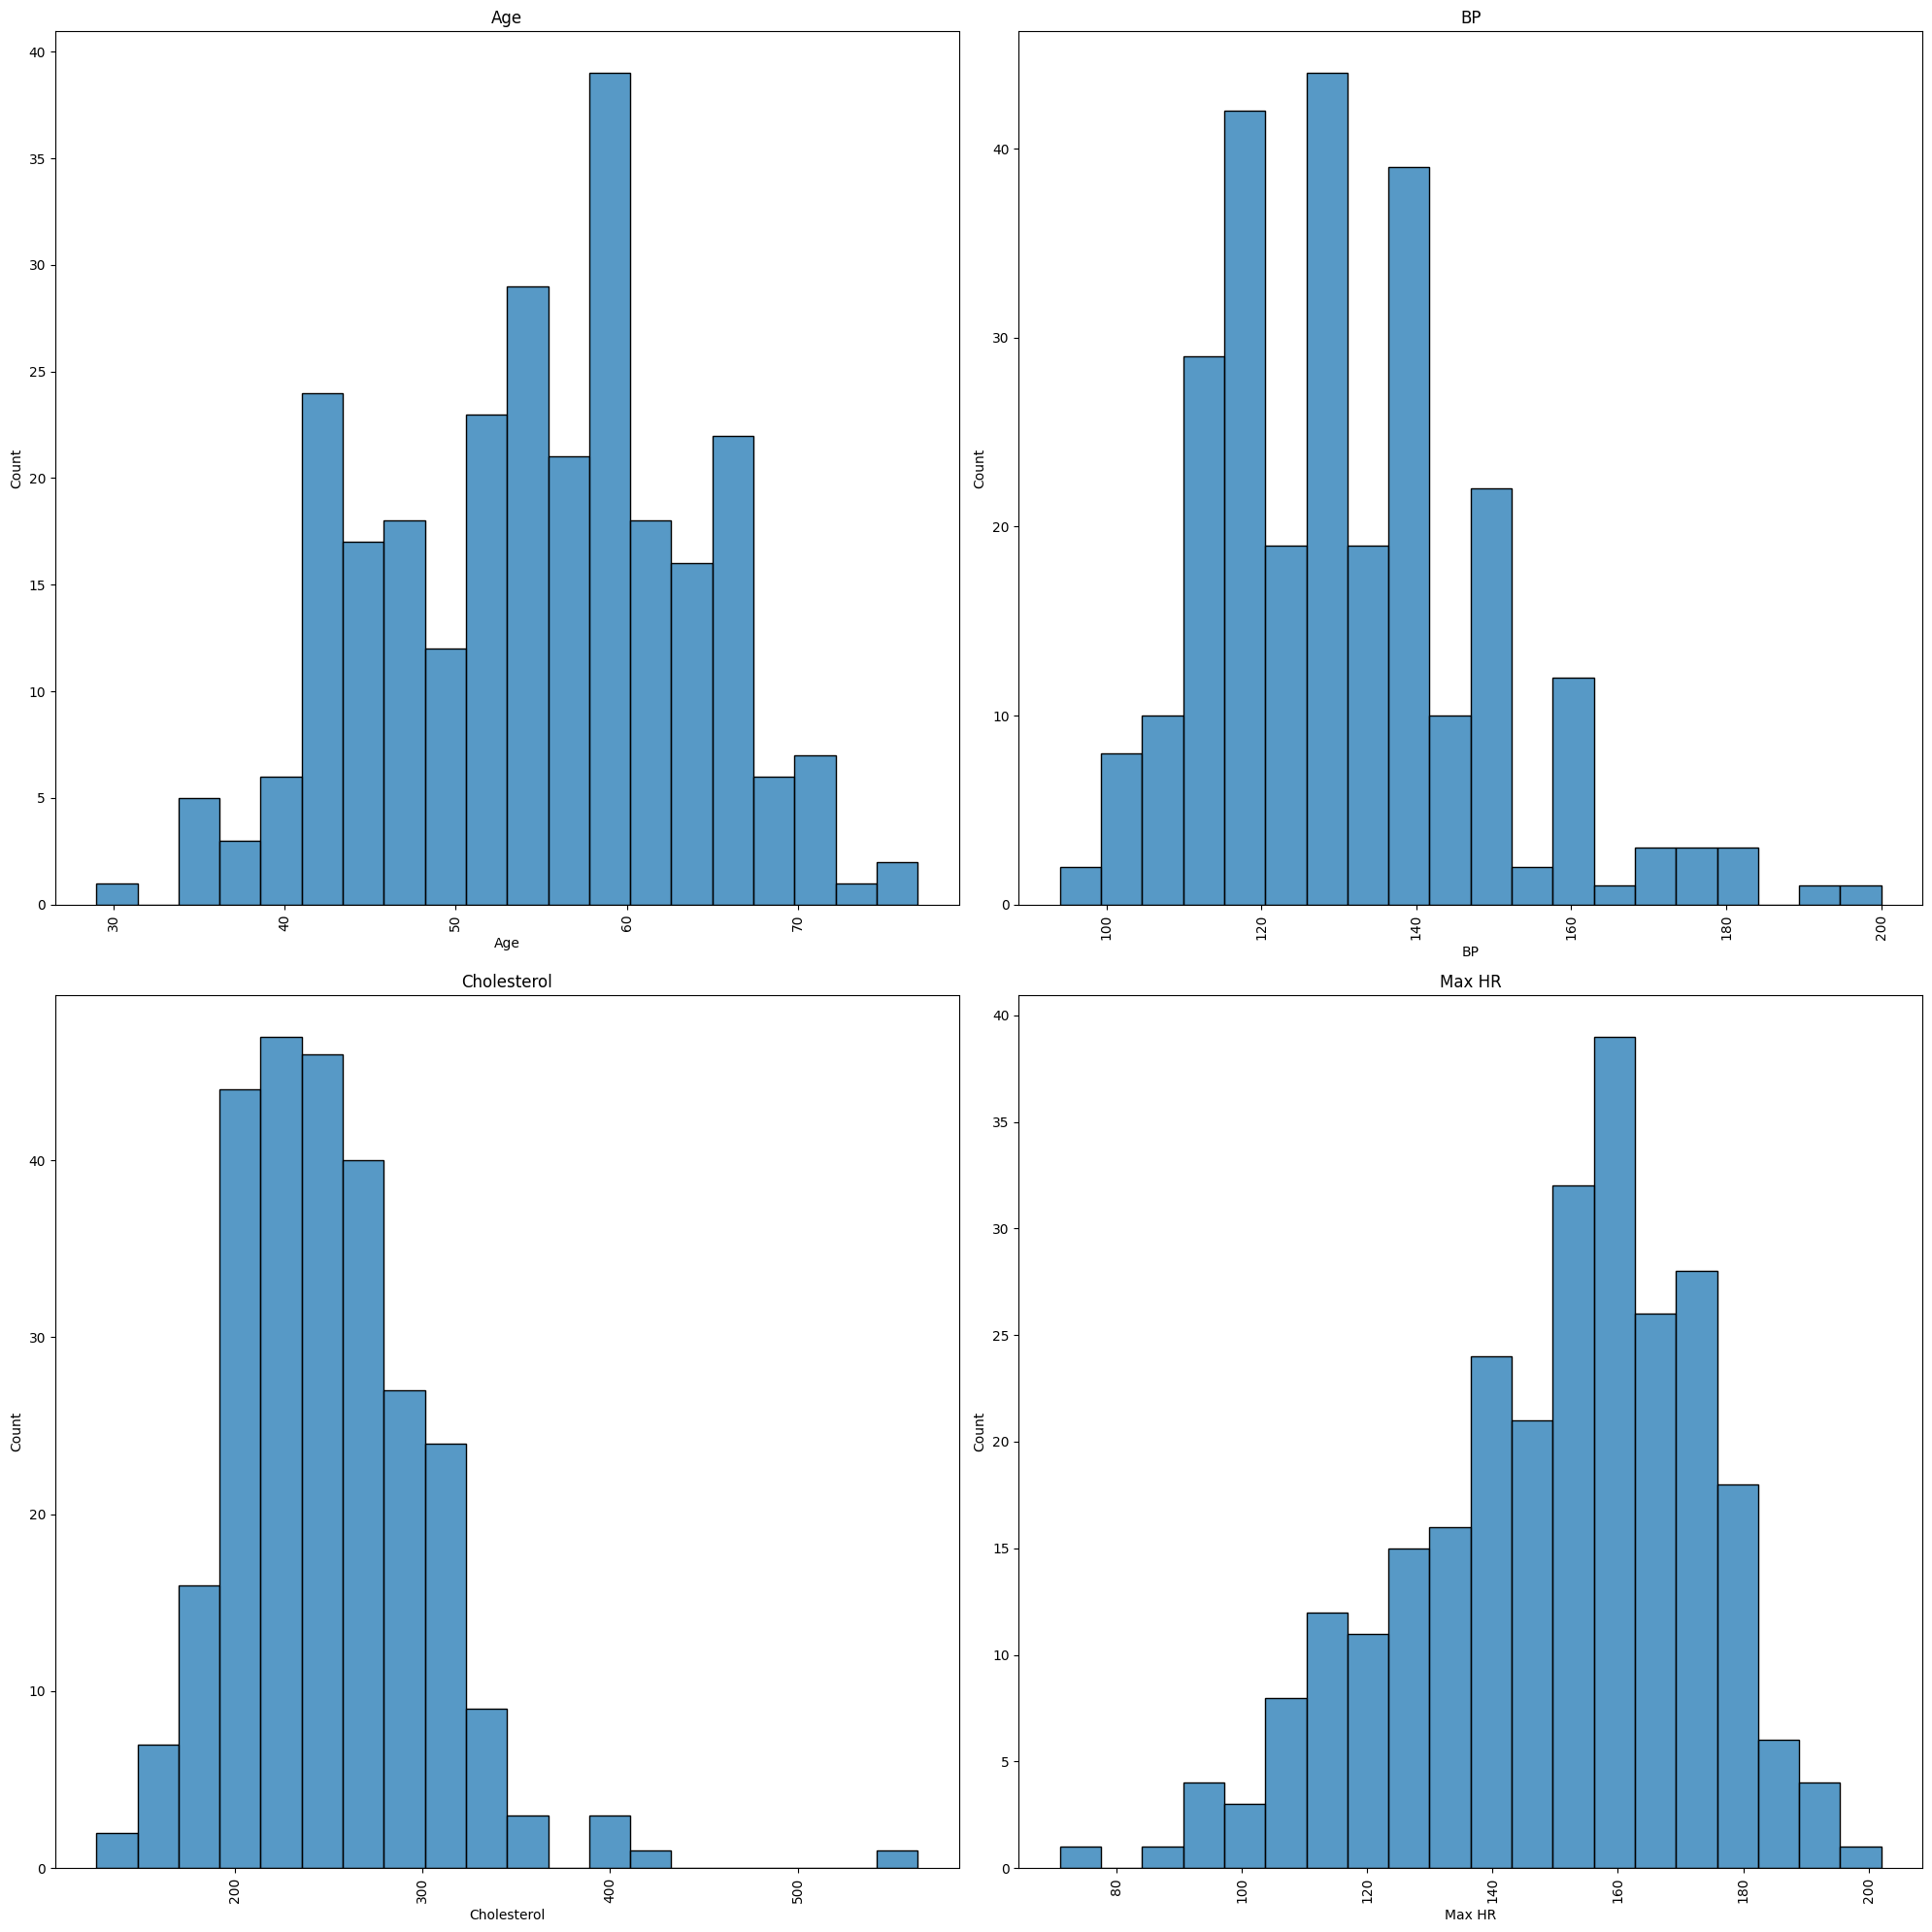

In [127]:
#Visualizing the columns
Cat_columns=df.select_dtypes(include='category').columns
Num_columns=df.select_dtypes(include='int').columns
#Visualizing the numerical columns
plt.figure(figsize=(20, 20))        
for i in range(len(Num_columns)):
    plt.subplot(2, 2, i+1)
    sns.histplot(x=Num_columns[i], data=df, bins=20)
    plt.title(Num_columns[i])
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Categorical Variables Visualization

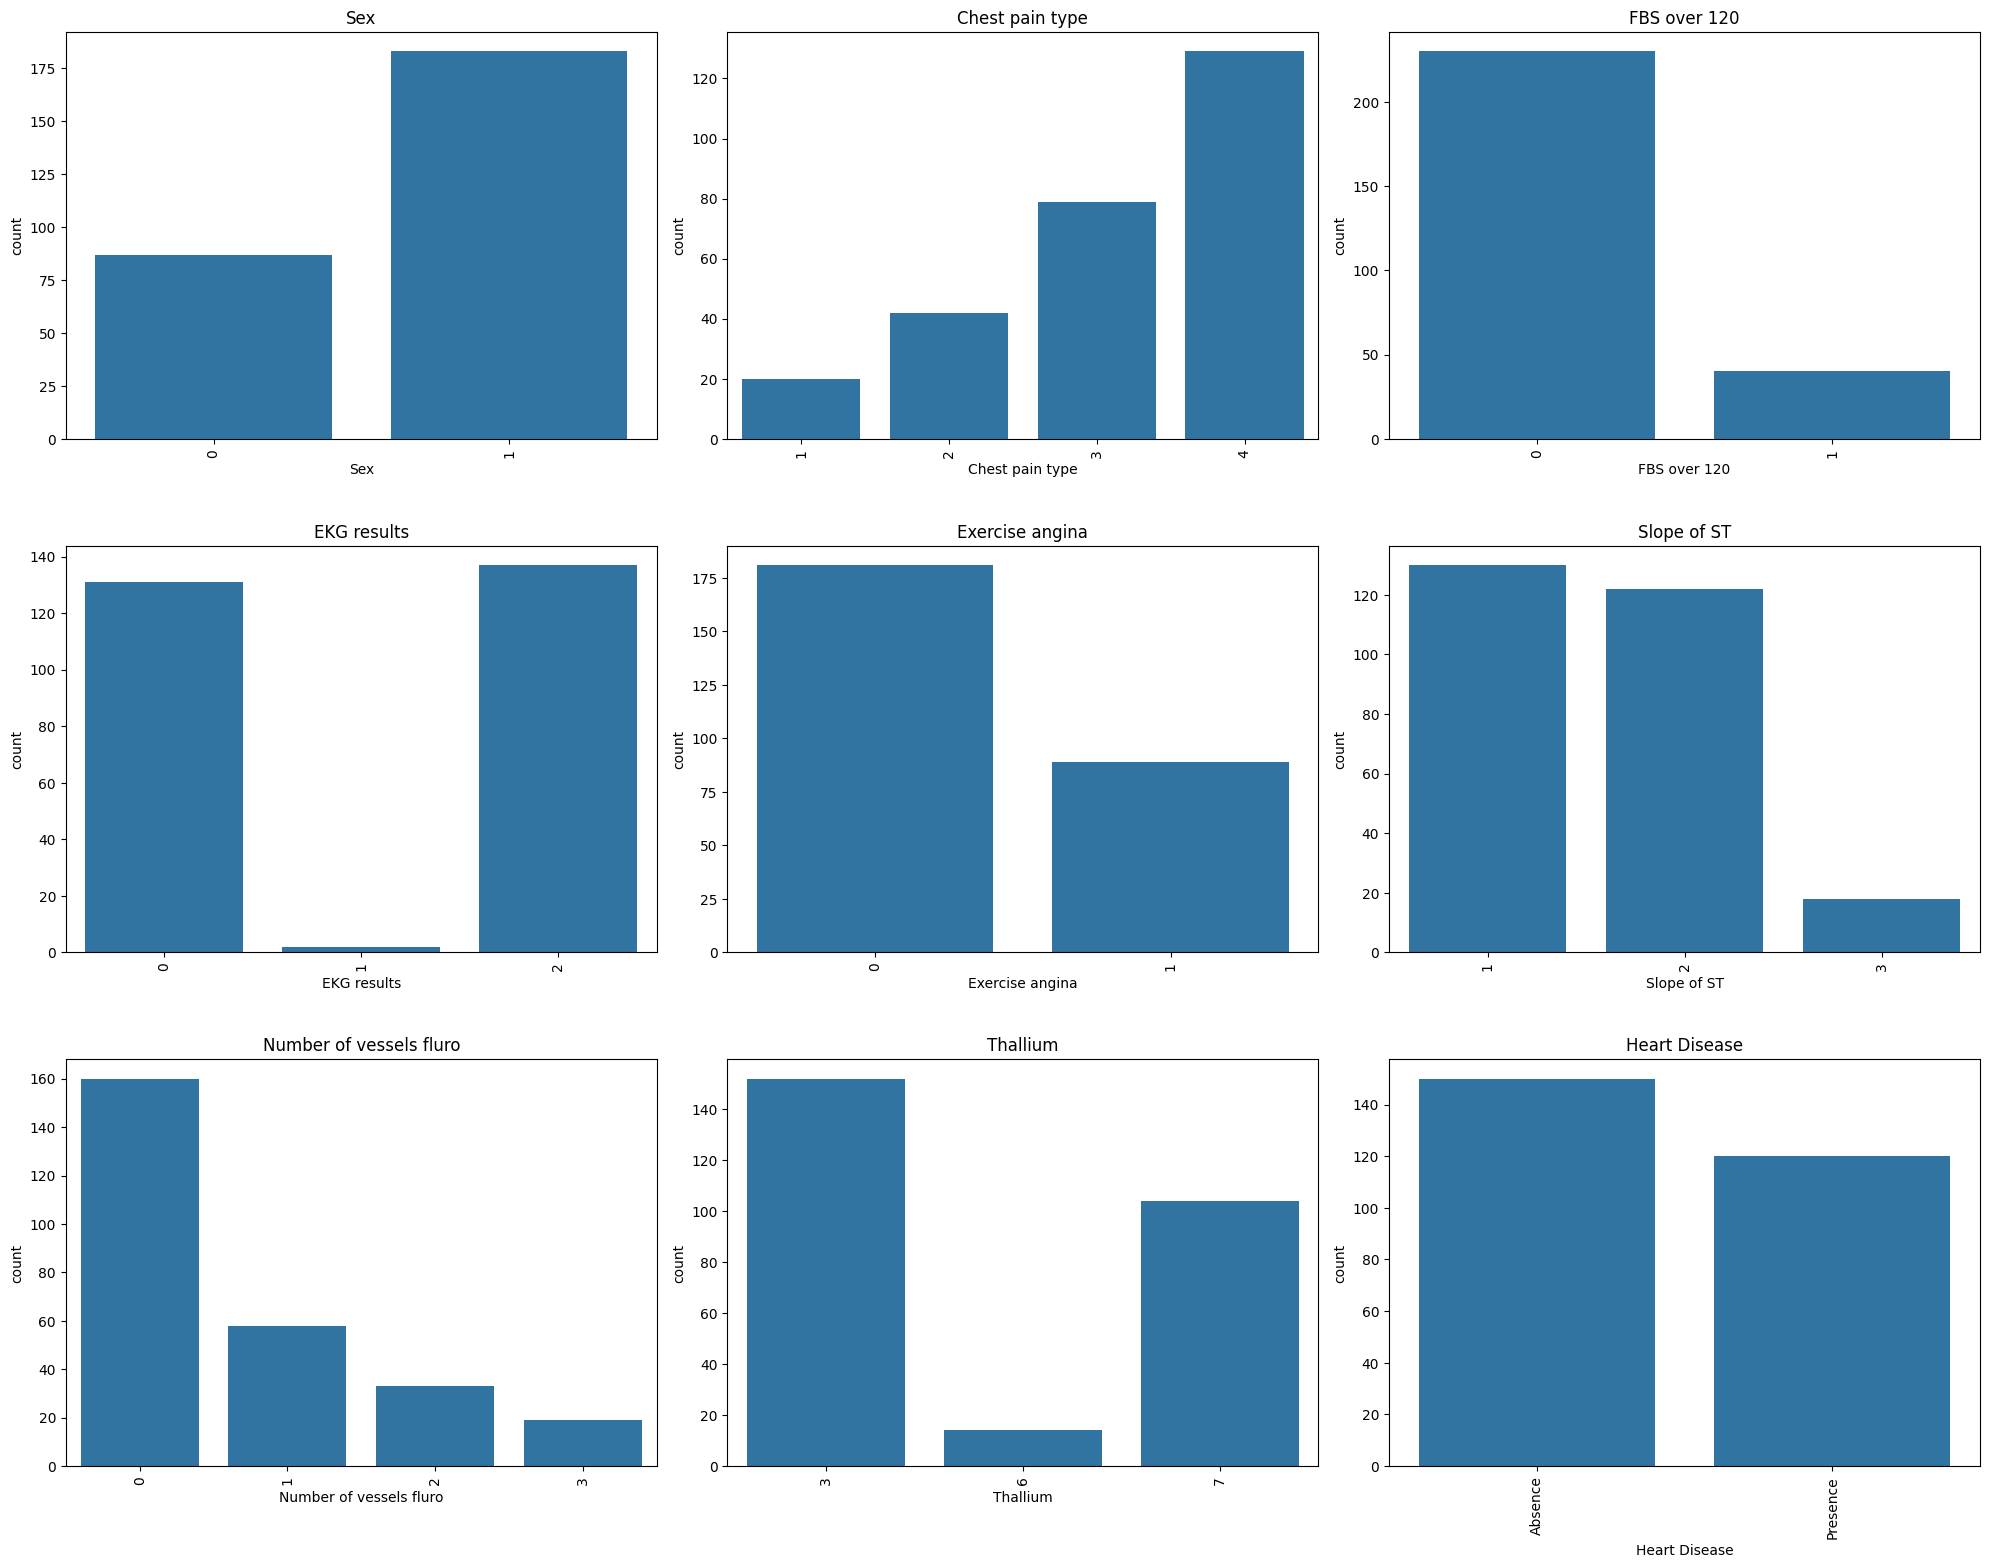

In [128]:
#Visualizing the categorical columns
plt.figure(figsize=(20, 20))    
for i in range(len(Cat_columns)):
    plt.subplot(4, 3, i+1)
    sns.countplot(x=Cat_columns[i], data=df)
    plt.title(Cat_columns[i])
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show() 

Outlier Analysis

In [129]:
Num_columns

Index(['Age', 'BP', 'Cholesterol', 'Max HR'], dtype='object')

In [130]:
for i in Num_columns:
    print('Skewnwess of', i, 'is:', df[i].skew())

Skewnwess of Age is: -0.16361522733654557
Skewnwess of BP is: 0.7226180070438306
Skewnwess of Cholesterol is: 1.1837208885656836
Skewnwess of Max HR is: -0.5277366828794363


In [131]:
df['Age'].describe()

count   270.000000
mean     54.433333
std       9.109067
min      29.000000
25%      48.000000
50%      55.000000
75%      61.000000
max      77.000000
Name: Age, dtype: float64

Since the min and max values of age columns are possible it doesn't have any outliers.


count   270.000000
mean    131.344444
std      17.861608
min      94.000000
25%     120.000000
50%     130.000000
75%     140.000000
max     200.000000
Name: BP, dtype: float64


<Axes: xlabel='BP', ylabel='Density'>

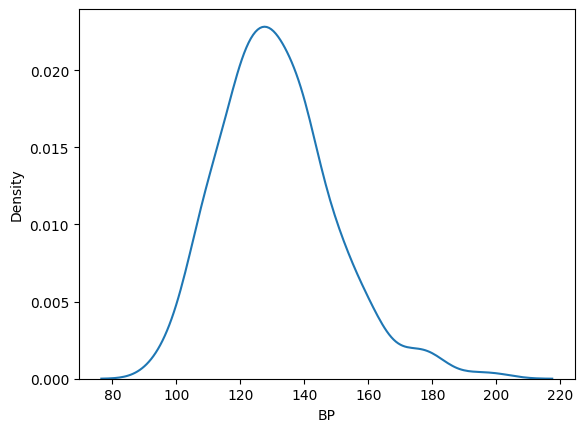

In [132]:
print(df['BP'].describe())
sns.kdeplot(df['BP'])

def bp_category(bp):
    if bp < 120:
        return 'Normal'
    elif bp < 130:
        return 'Elevated'
    elif bp < 140:
        return 'Hypertension Stage 1'
    elif bp < 180:
        return 'Hypertension Stage 2'
    else:
        return 'Hypertensive Crisis'

df['BP_Category'] = df['BP'].apply(bp_category)

The values of the BP column with a max value of 200 is possble but very rare. So thier can perform the interquartile range or we can further classify it as above mentioned format as categorical feature.

count   270.000000
mean    249.659259
std      51.686237
min     126.000000
25%     213.000000
50%     245.000000
75%     280.000000
max     564.000000
Name: Cholesterol, dtype: float64


<Axes: xlabel='Cholesterol', ylabel='Density'>

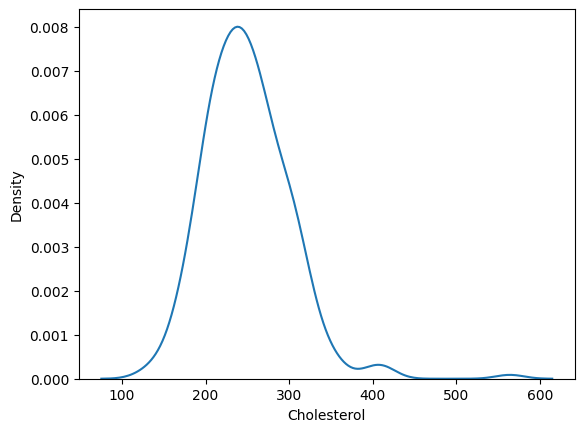

In [133]:
print(df['Cholesterol'].describe())
sns.kdeplot(df['Cholesterol'])

In [134]:
df['Max HR'].describe()

count   270.000000
mean    149.677778
std      23.165717
min      71.000000
25%     133.000000
50%     153.500000
75%     166.000000
max     202.000000
Name: Max HR, dtype: float64

Since Age feature doesn't require any outlier analysis,changing the type of variable for instance to skip the outlier analysis.

In [135]:
df['Age']=df['Age'].astype('category')

In [114]:
df_new = df[
    ~((df.select_dtypes(include='number') < (df.select_dtypes(include='number').quantile(0.25) - 1.5 * (df.select_dtypes(include='number').quantile(0.75) - df.select_dtypes(include='number').quantile(0.25)))) |
      (df.select_dtypes(include='number') > (df.select_dtypes(include='number').quantile(0.75) + 1.5 * (df.select_dtypes(include='number').quantile(0.75) - df.select_dtypes(include='number').quantile(0.25))))
    ).any(axis=1)
]

Chaning the Age Feature back to its original type.

In [141]:
df['Age']=df['Age'].astype('int')

We can see the decrease in the shape compared to original shape.There is 6% loss in the data.

In [140]:
(270-252)/270*100

6.666666666666667

In [137]:
df_new.shape,df.shape

((252, 14), (270, 14))

One Hot Encoding


In [143]:
Cat_columns=Cat_columns.drop('Heart Disease')

Since the target variable has to be separated.

In [145]:
Encoded=pd.get_dummies(df_new[Cat_columns], drop_first=True)
df_encoded=pd.concat([df_new[Num_columns], Encoded], axis=1)
df_encoded.head()
df_encoded.columns

Index(['Age', 'BP', 'Cholesterol', 'Max HR', 'Sex_1', 'Chest pain type_2',
       'Chest pain type_3', 'Chest pain type_4', 'FBS over 120_1',
       'EKG results_1', 'EKG results_2', 'Exercise angina_1', 'Slope of ST_2',
       'Slope of ST_3', 'Number of vessels fluro_1',
       'Number of vessels fluro_2', 'Number of vessels fluro_3', 'Thallium_6',
       'Thallium_7'],
      dtype='object')

In [146]:
df_new['Heart Disease']=df_new['Heart Disease'].replace({'Presence':1, 'Absence':0})
df_encoded['Heart Disease']=df_new['Heart Disease']

In [147]:
#Splitting the data into train and test
X = df_encoded.drop('Heart Disease', axis=1)
y = df_encoded['Heart Disease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)   

(201, 19) (201,)
(51, 19) (51,)


Scaling and Transformation of data


In [191]:
#Scaling the data
scaler=StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
Xtrain=pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = scaler.transform(X_test)
Xtest=pd.DataFrame(X_test_scaled, columns=X_test.columns)

Creating a generalized funtion to calculate the perfomenace metrics values of the test set.

In [183]:
def get_test_score(model,test_data):
    test_pred=model.predict(test_data)
    return classification_report(y_test,test_pred)


Creating a function to plot the Confusion Matrix.

In [184]:
def plot_confusion_matrix(model,test_data):
    plt.figure(figsize=(8,6))
    test_pred=model.predict(test_data)
    cm=confusion_matrix(y_test,test_pred)
    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
    sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.show()





Creating a function to plot the ROC_AUC for all the models

In [185]:
def plot_roc_auc(model,test_data):
    plt.figure(figsize=(8,6))
    test_pred_proba=model.predict_proba(test_data)[:,1]
    fpr,tpr,threshold=roc_curve(y_test,test_pred_proba)
    plt.plot(fpr,tpr,label='ROC curve')
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.plot([0,1],[0,1],'r--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve')
    # add the AUC score to the plot
    # 'x' and 'y' gives position of the text
    # 's' is the text 
    # use round() to round-off the AUC score upto 4 digits
    plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(y_test, test_pred_proba),4)))

    # plot the grid
    
    


In [192]:
#Logistic Regression
Logreg=LogisticRegression()
Logreg.fit(Xtrain, y_train)

LogisticRegression()

In [193]:
print('Logistic Regression')
print(get_test_score(Logreg,Xtest))

Logistic Regression
              precision    recall  f1-score   support

           0       0.87      0.93      0.90        29
           1       0.90      0.82      0.86        22

    accuracy                           0.88        51
   macro avg       0.89      0.87      0.88        51
weighted avg       0.88      0.88      0.88        51



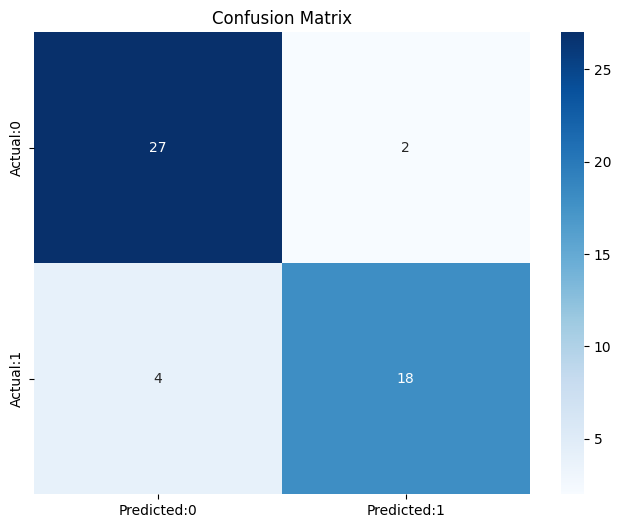

In [195]:
plot_confusion_matrix(Logreg,Xtest)

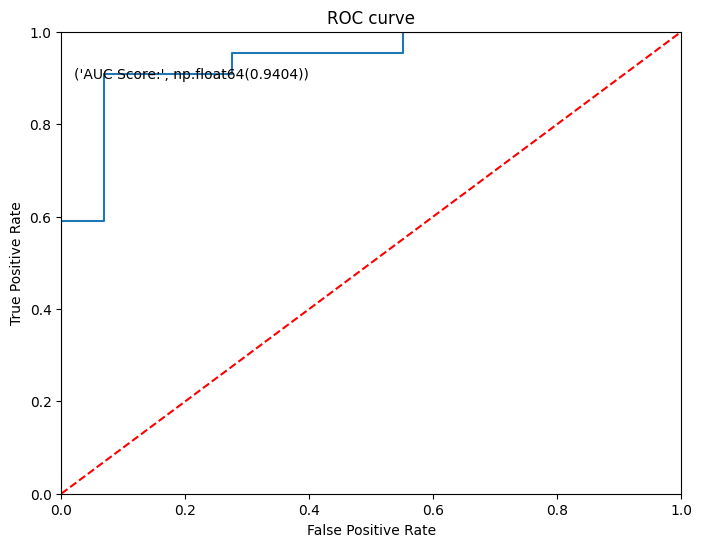

In [194]:
plot_roc_auc(Logreg,Xtest)

In [199]:
#Scaling the data using MinMaxScaler
mscaler=MinMaxScaler()
X_train_minscaler = scaler.fit_transform(X_train)
XtrainMin=pd.DataFrame(X_train_minscaler, columns=X_train.columns)
X_test_minscaler = scaler.transform(X_test)
XtestMin=pd.DataFrame(X_test_minscaler, columns=X_test.columns)

In [201]:
XtrainMin.shape, XtestMin.shape

((201, 19), (51, 19))

In [228]:
#KNN Tuning Hyperparameters
tuned_parameters = {
    'n_neighbors': np.arange(1, 20, 2),
    'metric': ['euclidean', 'manhattan', 'chebyshev']
}
knn=KNeighborsClassifier()
knn_cv=GridSearchCV(knn,tuned_parameters,cv=5,scoring='recall')
knn_cv.fit(Xtrain,y_train)
print('Best parameters for KNN Classifier: ', knn_cv.best_params_, '\n')


Best parameters for KNN Classifier:  {'metric': 'euclidean', 'n_neighbors': np.int64(15)} 



KNN Classifier
              precision    recall  f1-score   support

           0       0.78      0.86      0.82        29
           1       0.79      0.68      0.73        22

    accuracy                           0.78        51
   macro avg       0.79      0.77      0.78        51
weighted avg       0.78      0.78      0.78        51



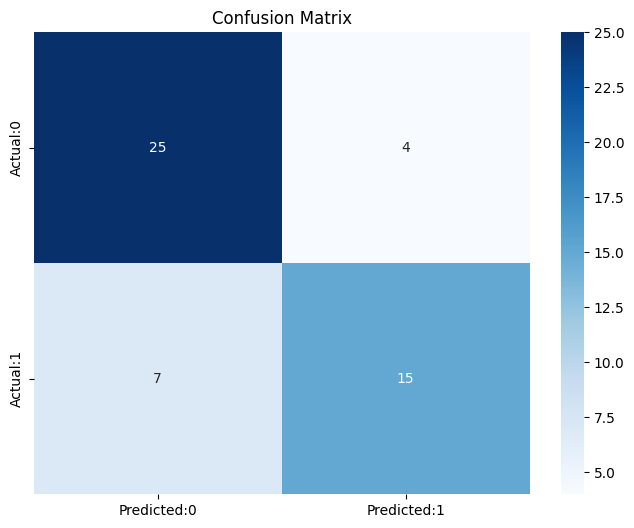

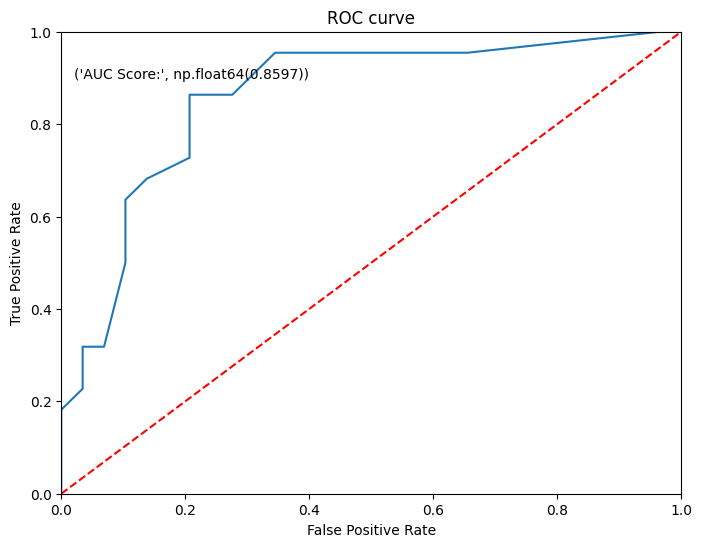

In [229]:
Knn15=KNeighborsClassifier(n_neighbors=15, metric='euclidean')
Knn15.fit(Xtrain, y_train)
print('KNN Classifier')
print(get_test_score(Knn15,Xtest))
plot_confusion_matrix(Knn15,Xtest)
plot_roc_auc(Knn15,Xtest)